In [11]:
import cv2
import imageio
import matplotlib.pyplot as plt

from detection import *
from mrcnn import visualize
from peek_behind import peek_behind, expand_mask

cv2.ocl.setUseOpenCL(False)

In [12]:
sample_path = "samples/german"

query_image_path = os.path.join(sample_path, 'source.jpg')
side_image_path = os.path.join(sample_path, 'dest.jpg')

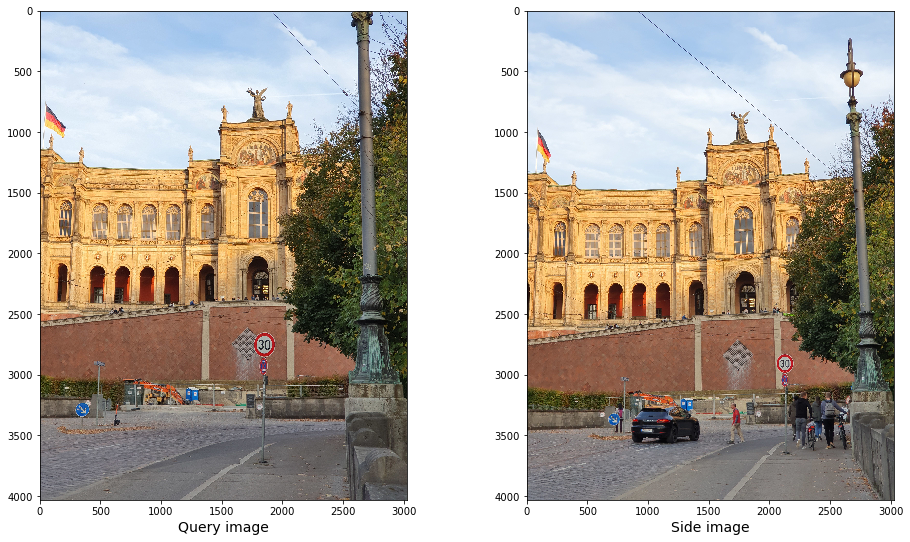

In [13]:
query_image = imageio.imread(query_image_path)
side_image = imageio.imread(side_image_path)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,9))
ax1.imshow(query_image, cmap="gray")
ax1.set_xlabel("Query image", fontsize=14)

ax2.imshow(side_image, cmap="gray")
ax2.set_xlabel("Side image", fontsize=14)

plt.show()

Create mask

Processing 1 images
image                    shape: (4032, 3024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 22)               min:    0.00000  max: 4032.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


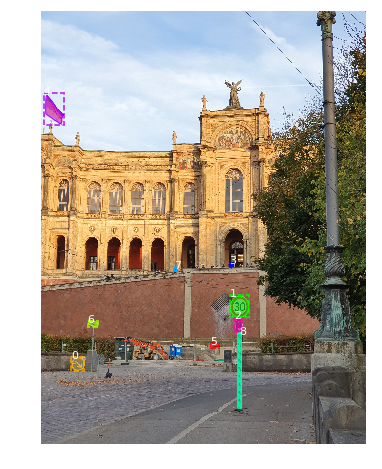

In [14]:
def get_ax(rows=1, cols=1, size=8):
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

detection_result = detect(query_image)

count_detection = len(detection_result['scores'])

detection_indexes = list(map(lambda x:  str(x), range(count_detection)))

visualize.display_instances(query_image, detection_result['rois'], detection_result['masks'], detection_result['class_ids'], 
                            COCO_CLASSES, detection_result['scores'], ax=get_ax(), captions=detection_indexes)

In [15]:
deleted_object = [0, 1, 2, 8]

In [16]:
height, width, _ = query_image.shape

masks = detection_result['masks']

mask = np.zeros((height, width))
for i in range(0, len(deleted_object)):
    object_mask = masks[:,:, deleted_object[i]]     
    object_mask = expand_mask(object_mask, pixels=15)   
    mask = np.add(mask, object_mask)

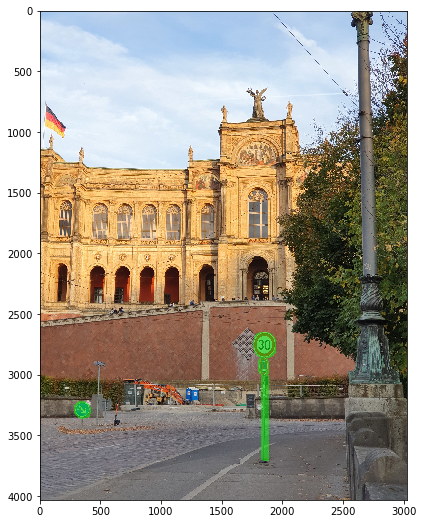

In [17]:
mask = mask.astype(np.bool).astype(np.uint8)

color = visualize.random_colors(3)[0]
image_with_mask = visualize.apply_mask(query_image.copy(), mask, color)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.imshow(image_with_mask, cmap="gray")
plt.show()

In [18]:
image_shape = (1440, 1920)
side_image =  cv2.resize(side_image, image_shape)
query_image = cv2.resize(query_image, image_shape)
mask = cv2.resize(mask, image_shape)

features = {
    "feature_extractor" : 'sift',
    "feature_matching" : 'knn' 
}


result = peek_behind(query_image, mask, side_image, features)

Raw matches (knn): 17421


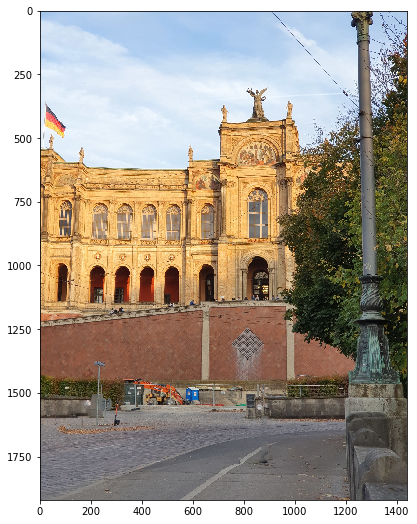

In [19]:
result = result.astype(np.uint8)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.imshow(result, cmap="gray")
plt.show()
plt.imsave("result.jpg", result)